<a href="https://colab.research.google.com/github/SaiEshwar-Pennada/Brain_Tumor_Detection/blob/main/Brain_tumor_Detection_Using_Knn_%2C_Random_Forest%2C_XG_boost%2C_Logic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import os
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/Brain Tumor.csv')
data

In [ ]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


data[scalable]=StandardScaler().fit_transform(data[scalable])
data

<ipython-input-15-e1d4aa1b7424>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a= _data[class1]['Energy'], label="Tumor")
<ipython-input-15-e1d4aa1b7424>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = _data[class0]['Energy'], label="No tumor" )


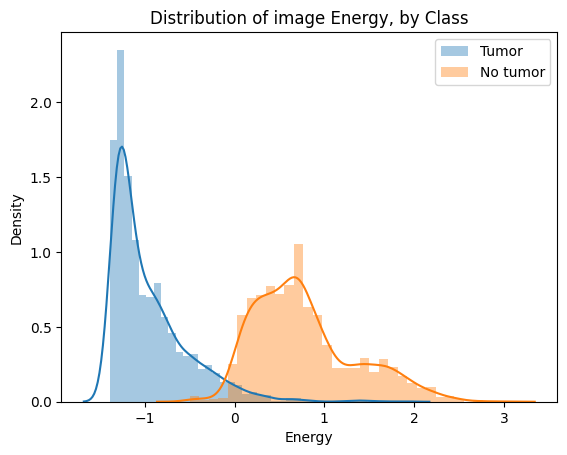

In [ ]:
class1=data['Class']== 1
class0=data['Class']== 0
_data=data.copy()
_data=data.drop('Image',axis=1,inplace=False)
sns.distplot(a= _data[class1]['Energy'], label="Tumor")
sns.distplot(a = _data[class0]['Energy'], label="No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()

<ipython-input-16-dd9cccb1b597>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a= _data[class1]['Entropy'], label="Tumor")
<ipython-input-16-dd9cccb1b597>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = _data[class0]['Entropy'], label="No tumor" )


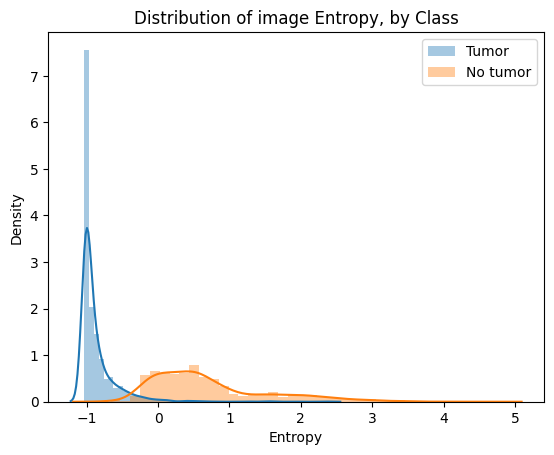

In [ ]:
sns.distplot(a= _data[class1]['Entropy'], label="Tumor")
sns.distplot(a = _data[class0]['Entropy'], label="No tumor" )
plt.title("Distribution of image Entropy, by Class")
plt.legend()

In [ ]:
y=data["Class"]
X = data[scalable]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=2)
print(y_test)

2955    0
3321    1
1851    0
1760    1
1002    0
       ..
692     1
2279    0
948     0
1654    1
594     1
Name: Class, Length: 1129, dtype: int64


# **XG Boost**

In [ ]:
model = xgboost.XGBClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9893711248892826

# **Logic Regression**

In [ ]:
logr= LogisticRegression(dual=False, verbose=1, random_state=  4)
logr.fit(X_train , y_train )
logr.score(X_test,y_test)

0.9716563330380869

# **Random Forest**

In [ ]:
RFclf = RandomForestClassifier(n_estimators = 2000, random_state= 4 ,verbose=1)
RFclf.fit( X_train, y_train  )
RFclf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    9.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s


0.9858281665190434

# **KNN**

In [ ]:
knn=KNeighborsClassifier( algorithm='auto' ,leaf_size= 50,n_neighbors= 5)
knn.fit(X_train,y_train )
knn.score ( X_test,y_test)

0.9813994685562445